The following plots are from Jacobs data on cement with copper wires (Path: Cement_wt_cu_wires/O1/2021-04-09/Trial1/10.0V)

In [2]:
# Import relavent files:

exec(open('ComputeDelays.py').read())


pr0=timedata('pr0')        # Probe only at delay 0, S1
readlabdat('pr0.csv',pr0)

pu0=timedata('pu0')        # PUMP only at delay 0, S2
readlabdat('pu0.csv',pu0)

pp0=timedata('pp0')        # PUMP and Probe at delay 0, S3
readlabdat('pp0.csv',pp0)


# Compute perturbed probe, S4 = S3 - S2:

pu_perturbed0 = pp0.data - pu0.data


Excerpt from Jacob's thesis (Pg 15): 

"We use an arbitrary waveform generator (Keysight 33500B Series) to excite both the pump and the probe signals. We choose the probe wave to be a low-amplitude (5 V), high-frequency (500 kHz) signal relative to the pump wave’s high-amplitude (10 V
amplified 50x by a TEGAM HIGH Voltage Amplifier), low-frequency (50 kHz) character. We use a relatively low amplitude for the probe wave to preserve the medium’s elastic parameters during the probe’s transmission (i.e., the source of perturbation
is due exclusively to the pump wave and not the probe). We use a high amplitude for the pump to induce a large enough perturbation to be sensed by the probe wave. We choose the probe and pump frequencies such that the pump wavelength is significantly larger (≈ x10) than that of the probe wavelength. This choice results in an approximately steady-state pump wave at the timescale of the probe, thus granting us the ability to sense different phases of the pump waveform with the high-frequency probe.

We choose both the pump and probe to be shear waves (S-waves) which allows for more freedom when defining how we orientate the polarization of the waves relative to different types of inhomogeneities."

Text(0, 0.5, 'Voltage (V)')

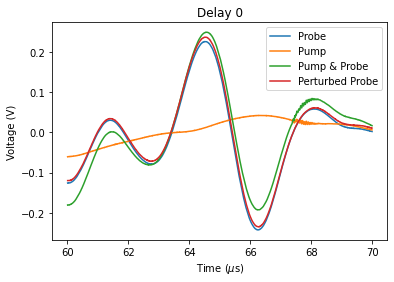

In [23]:
plt.plot(pr0.time*1e6,pr0.data,label='Probe')
plt.plot(pu0.time*1e6,pu0.data,label='Pump')
plt.plot(pp0.time*1e6,pp0.data,label='Pump & Probe')
plt.plot(pr0.time*1e6,pu_perturbed0,label='Perturbed Probe')
plt.legend()
plt.title("Delay 0")
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Voltage (V)")

Text(0, 0.5, 'Voltage (V)')

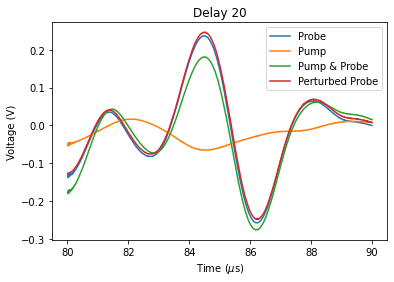

In [24]:
pr20=timedata('pr20')        # Probe only at delay 20, S1
readlabdat('pr20.csv',pr20)

pu20=timedata('pu20')        # PUMP only at delay 0, S2
readlabdat('pu20.csv',pu20)

pp20=timedata('pp20')        # PUMP and Probe at delay 0, S3
readlabdat('pp20.csv',pp20)


# Compute perturbed probe, S4 = S3 - S2:

pu_perturbed20 = pp20.data - pu20.data

plt.plot(pr20.time*1e6,pr20.data,label='Probe')
plt.plot(pu20.time*1e6,pu20.data,label='Pump')
plt.plot(pp20.time*1e6,pp20.data,label='Pump & Probe')
plt.plot(pr20.time*1e6,pu_perturbed20,label='Perturbed Probe')
plt.legend()
plt.title("Delay 20")
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Voltage (V)")

In [25]:
pr40=timedata('pr40')        # Probe only at delay 40, S1
readlabdat('pr40.csv',pr40)

pu40=timedata('pu40')        # PUMP only at delay 40, S2
readlabdat('pu40.csv',pu40)

pp40=timedata('pp40')        # PUMP and Probe at delay 40, S3
readlabdat('pp40.csv',pp40)


# Compute perturbed probe, S4 = S3 - S2:

pu_perturbed40 = pp40.data - pu40.data

Text(0, 0.5, 'Voltage (V)')

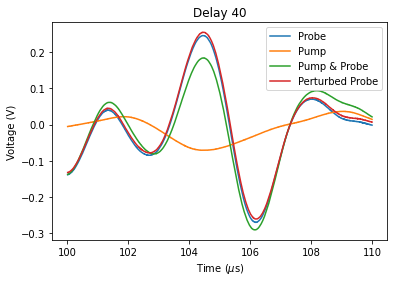

In [26]:
plt.plot(pr40.time*1e6,pr40.data,label='Probe')
plt.plot(pu40.time*1e6,pu40.data,label='Pump')
plt.plot(pp40.time*1e6,pp40.data,label='Pump & Probe')
plt.plot(pr40.time*1e6,pu_perturbed40,label='Perturbed Probe')
plt.legend()
plt.title("Delay 40")
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Voltage (V)")

Text(0, 0.5, 'Voltage (V)')

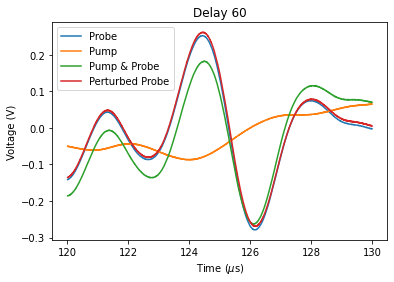

In [20]:
pr60=timedata('pr60')        # Probe only at delay 60, S1
readlabdat('pr60.csv',pr60)

pu60=timedata('pu60')        # PUMP only at delay 60, S2
readlabdat('pu60.csv',pu60)

pp60=timedata('pp60')        # PUMP and Probe at delay 60, S3
readlabdat('pp60.csv',pp60)


# Compute perturbed probe, S4 = S3 - S2:

pr_perturbed60 = pp60.data - pu60.data

plt.plot(pr60.time*1e6,pr60.data,label='Probe')
plt.plot(pu60.time*1e6,pu60.data,label='Pump')
plt.plot(pp60.time*1e6,pp60.data,label='Pump & Probe')
plt.plot(pr60.time*1e6,pr_perturbed60,label='Perturbed Probe')
plt.legend()
plt.title("Delay 60")
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Voltage (V)")




Oberservations/Questions:
- Are pump and probe mislabeled, or is the probe much larger and pump much smaller than expected.
- The time window is consistently 10 us, but the actual time increases as Delay # increases (longer delay means waves interact at later time)
- what is the signal at 67 us in the perturbed probe in Delay 0 and why is this not present at the other delay times I plotted?

- Code/path issue: how do I access files saved in folders outisde of the folder this script is in? ie How can I call on files without having to move them into this folder first?

In [6]:
# compare frequency of above signals

from myfft import myfft
fpr,FTpr = myfft(pr60.time,pr60.data) 
fpu,FTpu = myfft(pu60.time,pu60.data) 
fpp,FTpp = myfft(pp60.time,pp60.data) 
fper,FTper = myfft(pp60.time,pr_perturbed60)

plt.plot(fpr,np.abs(FTpr), label="probe")
plt.plot(fpu,np.abs(FTpu), label="pump")
plt.plot(fpp,np.abs(FTpp), label="pump & probe")
plt.plot(fper,np.abs(FTper), label="perturbed probe")
plt.xlim([0,1000])
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('FFT')

NameError: name 'pr60' is not defined

In [7]:
from myfft import myfft

f_pr,FT_pr=myfft(pr20.time,pr20.data)
f_pu,FT_pu=myfft(pu20.time,pu20.data)

plt.plot(f_pr,np.abs(FT_pr),label='probe')
plt.plot(f_pu,np.abs(FT_pu),label='pump')
plt.xlim([-100,1500])
plt.legend()
plt.xlabel('kHz')

NameError: name 'pr20' is not defined

In [8]:
# Compare FFT of probes at different delays

from myfft import myfft
fpr0,FTpr0 = myfft(pr0.time,pr0.data) 
fpr20,FTpr20 = myfft(pu20.time,pr20.data) 
fpr40,FTpr40 = myfft(pp40.time,pr40.data) 
fpr60,FTpr60 = myfft(pp60.time,pr60.data)

plt.plot(fpr0,np.abs(FTpr0), label="delay 0")
plt.plot(fpr20,np.abs(FTpr20), label="delay 20")
plt.plot(fpr40,np.abs(FTpr40), label="delay 40")
plt.plot(fpr60,np.abs(FTpr60), label="delay 60")
plt.xlim([0,1000])
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('FFT')


NameError: name 'pu20' is not defined

# Compare the probe at different frequencies - Jacobs data

Text(0.5, 1.0, 'Probe Frequency Testing')

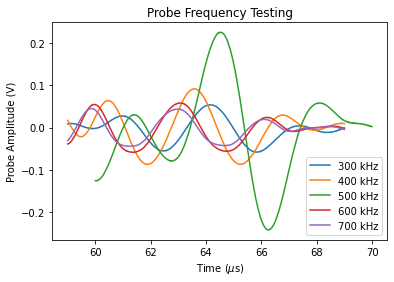

In [3]:
import pandas as pd

df_3 = pd.read_csv('Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/300kHz/2021-07-23/Trial1/10.0V/pr0.csv')
df_4 = pd.read_csv('Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/400kHz/2021-07-25/Trial1/10.0V/pr0.csv')
df_5 = pd.read_csv('Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/2021-04-09/Trial1/10.0V/pr0.csv') # original run was at 500 kHz
df_6 = pd.read_csv('Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/600kHz/2021-07-26_02/Trial1/10.0V/pr0.csv')
df_7 = pd.read_csv('Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/700kHz/2021-07-27/Trial1/10.0V/pr0.csv')

# Rename columns using indices
time3 = df_3.iloc[:,0]
voltage3 = df_3.iloc[:,1]
time4 = df_4.iloc[:,0]
voltage4 = df_4.iloc[:,1]
time5 = df_5.iloc[:,0]
voltage5 = df_5.iloc[:,1]
time6 = df_6.iloc[:,0]
voltage6 = df_6.iloc[:,1]
time7 = df_7.iloc[:,0]
voltage7 = df_7.iloc[:,1]

plt.plot(time3*1e6,voltage3,label="300 kHz")
plt.plot(time4*1e6,voltage4,label="400 kHz")
plt.plot(time5*1e6,voltage5,label="500 kHz")
plt.plot(time6*1e6,voltage6,label="600 kHz")
plt.plot(time7*1e6,voltage7,label="700 kHz")

plt.legend()
plt.xlabel("Time ($\mu$s)")
plt.ylabel('Probe Amplitude (V)')
plt.title('Probe Frequency Testing')



Text(0.5, 1.0, 'Probe Frequency Testing')

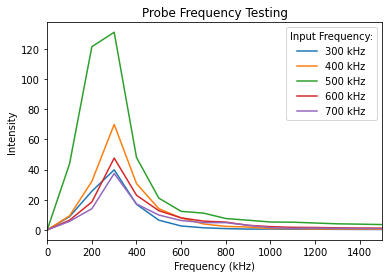

In [9]:
f3,FT3 = myfft(time3,voltage3) 
f4,FT4 = myfft(time4,voltage4)
f5,FT5 = myfft(time5,voltage5)
f6,FT6 = myfft(time6,voltage6)
f7,FT7 = myfft(time7,voltage7)

plt.plot(f3,np.abs(FT3), label="300 kHz")
plt.plot(f4,np.abs(FT4), label="400 kHz")
plt.plot(f5,np.abs(FT5), label="500 kHz")
plt.plot(f6,np.abs(FT6), label="600 kHz")
plt.plot(f7,np.abs(FT7), label="700 kHz")
plt.xlim([0,1500])
plt.legend(title='Input Frequency:')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('Probe Frequency Testing')

In [ ]:
# one of the things i'm working on is narrowing these peaks to improve the frequency resolution, 
# so we can say with more confidence what is the frequency of the wave

# The result that inspired this thesis work:
# we would expect the frequency of a wave to be the same before and after it passes through a sample
# However, this plot tells a very different story. Regardless of what frequcy we sent into the sample (300-700 kHz),
# the wave that came out was roughly 300 kHz
# this tells us that one of two things are happening:
# 1) the transducers or one of the devices are not working properly (we arent actually sending in diff frequencies)
# 2) Or, something really interesting is happening inside the sample, causing the frequency of the wave to change.

**Normalized 'plot that started it all'**

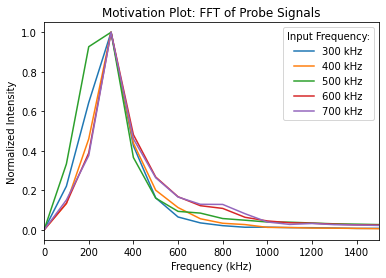

In [10]:
plt.plot(f3,np.abs(FT3)/max(np.abs(FT3)), label="300 kHz")
plt.plot(f4,np.abs(FT4)/max(np.abs(FT4)), label="400 kHz")
plt.plot(f5,np.abs(FT5)/max(np.abs(FT5)), label="500 kHz")
plt.plot(f6,np.abs(FT6)/max(np.abs(FT6)), label="600 kHz")
plt.plot(f7,np.abs(FT7)/max(np.abs(FT7)), label="700 kHz")
plt.xlim([0,1500])
plt.legend(title='Input Frequency:')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Normalized Intensity')
plt.title('Motivation Plot: FFT of Probe Signals')
plt.savefig("Figures/Motivation_data.jpeg",dpi=300)

**I need to test the transducers on cement, for my paper as a control**

In [15]:
# Frequency at peak (Hz):
print(f7[np.argmax(np.abs(FT7))])

-300.12004801956647


In [11]:
f7[2]-f7[1]

100.04001600653282

# Check frequency of pump: (which we know was amplified)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Pump Frequency Testing - delay 0 cement w 5mm cu')

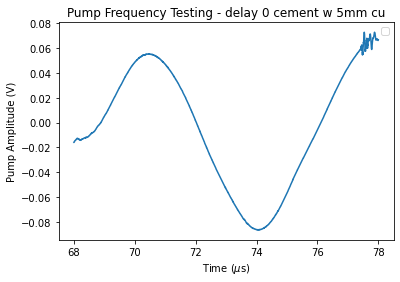

In [17]:
# Jacobs data
# Pump at 50 kHz, amplified S-wave pump, Cement w 5mm copper wires, 600 kHz probe

pump = pd.read_csv('Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/600kHz/2021-07-26_02/Trial1/10.0V/pu9.csv')
time_pump = pump.iloc[:,0]
voltage_pump = pump.iloc[:,1]

plt.plot(time_pump*1e6,voltage_pump)

plt.legend()
plt.xlabel("Time ($\mu$s)")
plt.ylabel('Pump Amplitude (V)')
plt.title('Pump - delay 0 cement w 5mm cu')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Pump - delay 0 cement w 5mm cu')

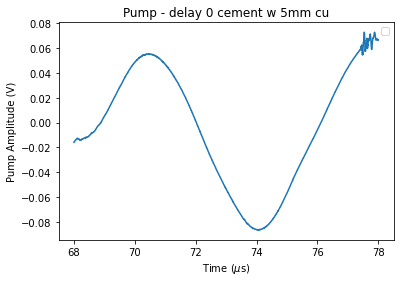

In [18]:
plt.plot(time_pump*1e6,voltage_pump)

plt.legend()
plt.xlabel("Time ($\mu$s)")
plt.ylabel('Pump Amplitude (V)')
plt.title('Pump - delay 0 cement w 5mm cu')